## Project : Personal Loan Campaign Analytics

## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

## Attribute Information

- ID : Customer ID
- Age : Customer's age in completed years
- Experience : #years of professional experience
- Income : Annual income of the customer '000 USD
- ZIP Code : Home Address ZIP code.
- Family : Family size of the customer
- CCAvg : Avg. spending on credit cards per month '000 USD
- Education : Education Level.
     - Undergrad
     - Graduate
     - Advanced/Professional
- Mortgage : Value of house mortgage if any. '000 USD
- Personal Loan : Did this customer accept the personal loan offered in the last campaign?
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by UniversalBank?

## Objectives of The Study:

- Exploratory Data Analysis
- Model Training
- Model Evaluation
- Model Improvement
- Model Selection

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd                                                       
import numpy as np                                                        
import seaborn as sns                                                   
import matplotlib.pyplot as plt                                         
import statsmodels.api as sm
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
from scipy.stats import f
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest
sns.set(color_codes=True)
%matplotlib inline
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix



Bad key "text.kerning_factor" on line 4 in
C:\Users\kaust\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Reading the Dataset

In [2]:
loan_data = pd.read_csv("E:\\Data For Training\\Bank_Personal_Loan.csv")

In [3]:
print(loan_data.shape)

(5000, 14)


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
loan_data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
## Dropping the 'ID' variable

loan_data = loan_data.drop('ID', axis = 1)

In [7]:
loan_data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# # Data Summary

loan_data.describe().transpose()

count          mean          std     min      25%  \
Age                 5000.0     45.338400    11.463166    23.0     35.0   
Experience          5000.0     20.104600    11.467954    -3.0     10.0   
Income              5000.0     73.774200    46.033729     8.0     39.0   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.0   
Family              5000.0      2.396400     1.147663     1.0      1.0   
CCAvg               5000.0      1.937938     1.747659     0.0      0.7   
Education           5000.0      1.881000     0.839869     1.0      1.0   
Mortgage            5000.0     56.498800   101.713802     0.0      0.0   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.0   
Securities Account  5000.0      0.104400     0.305809     0.0      0.0   
CD Account          5000.0      0.060400     0.238250     0.0      0.0   
Online              5000.0      0.596800     0.490589     0.0      0.0   
CreditCard          5000.0      0.294000     0.455637     0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIP Code            93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal Loan           0.0      0.0      1.0  
Securities Account      0.0      0.0      1.0  
CD Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

#### Snapshot of Data Summary
-  Minimum value of 'Experience' is negative. They can bee missing values. Deep dive is required
-  Distributions of 'Income', 'CCAvg', 'Mortgage' are uneven, presence of outliers is possible. Need to confirm through box plots and data consistency checks.
- "Experience",  "Family","Education", "Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard" should be converted to categorical variables due to their nature.
- "ZIP Code" ?

In [9]:
loan_data['Experience'] = loan_data['Experience'].abs()

In [10]:
loan_data['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [11]:
## Zip Code: How Many unique ZIP Codes are there

loan_data['ZIP Code'].nunique()

467

In [12]:
loan_data['ZIP Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [13]:
pd.set_option("display.max_rows", None)

In [14]:
loan_data['ZIP Code'].sort_values().value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
94025     52
91711     52
92093     51
90024     50
90245     50
91330     46
90089     46
94304     45
92121     45
94143     37
94608     34
95051     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94550     27
94542     27
94301     27
94501     26
95064     26
95039     26
95819     26
93407     26
94022     25
94105     25
95060     25
94303     25
91107     25
93117     24
94596     24
94080     23
93555     23
95521     23
92717     22
92612     22
91380     22
92647     21
94110     21
91768     21
94117     20
90034     20
90401     20
94132     20
95747     19
92122     19
90266     19
94005     19
92697     19
90025     19
93940     18
94709     18
90840     18
90291     18
92130     18
94309     18
94122     18
92691     17
90630     17
93023     17
92120     17
94583     17
90740     17
92009     17
92407     17
92096     17
91311     17

In [15]:
## Drop ZIP Code (427 unique ZIP. A lot of ZIP codes have a single value. May give us wrong interpretations if included)
loan_data = loan_data.drop('ZIP Code', axis = 1)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


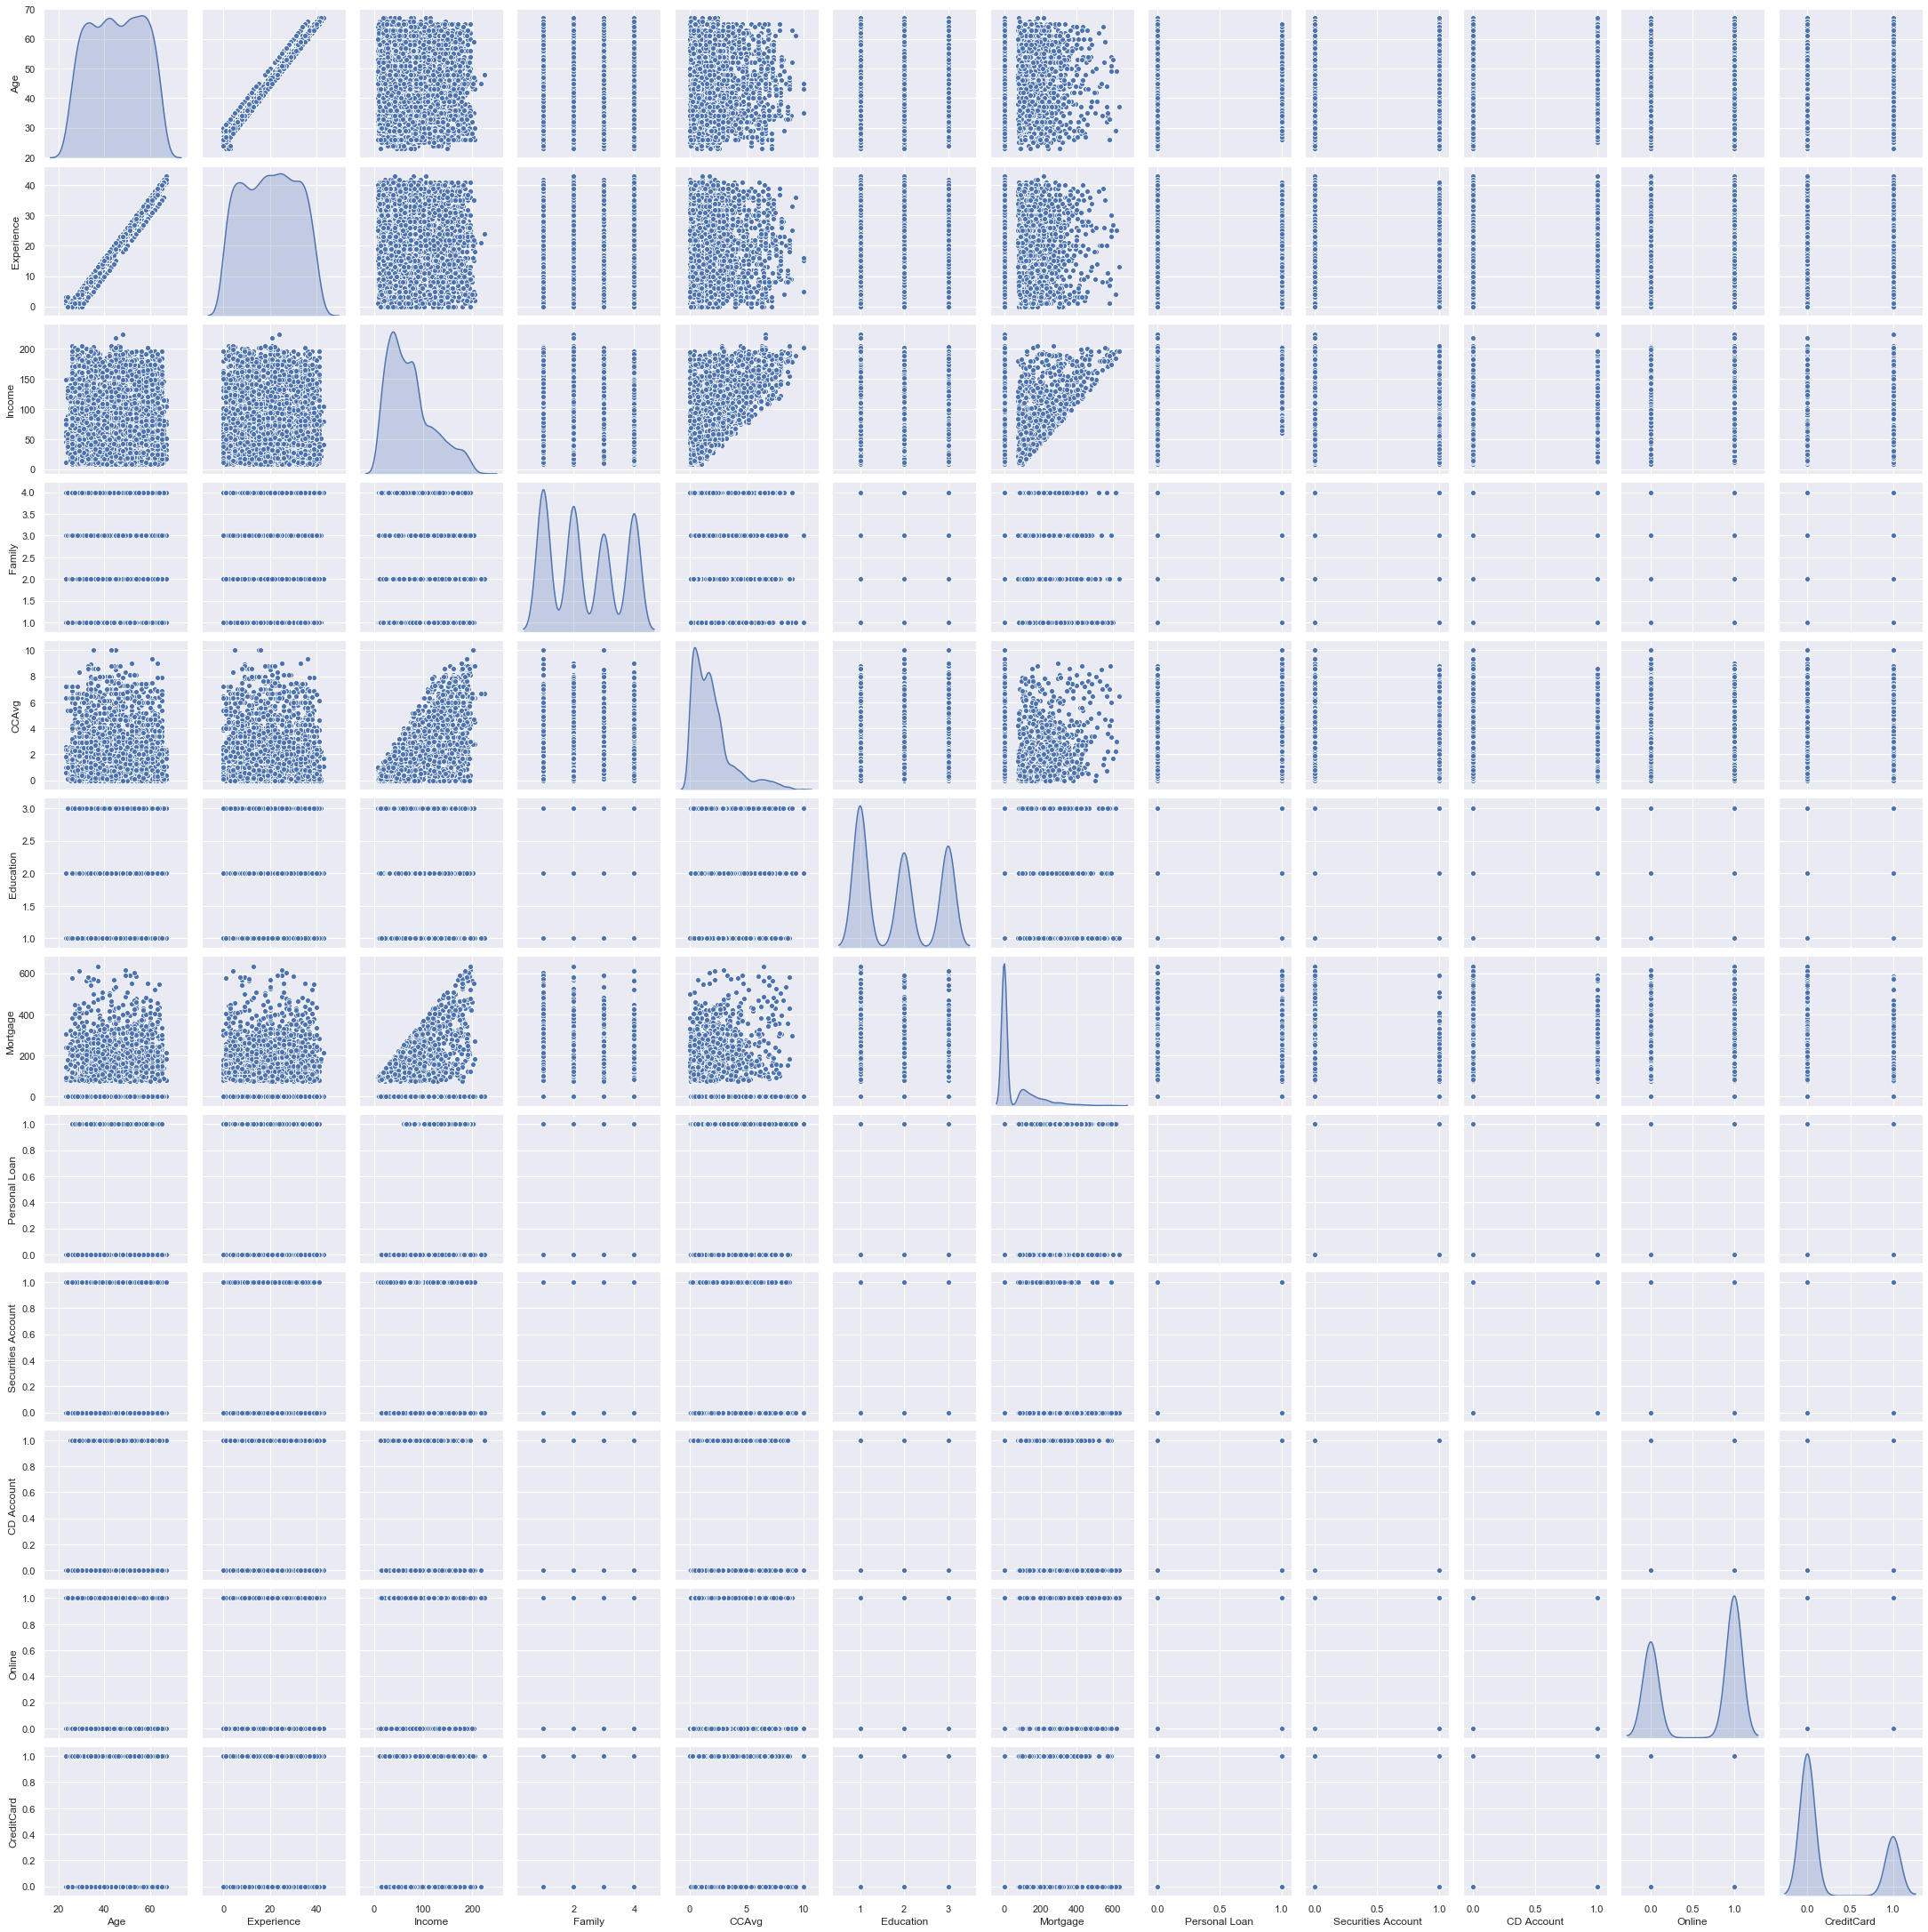

In [16]:
sns.pairplot(loan_data, diag_kind = "kde")

In [17]:
loan_data.groupby("Personal Loan")["Age"].min()

Personal Loan
0    23
1    26
Name: Age, dtype: int64

In [18]:
loan_data.groupby("Personal Loan")["Income"].min()

Personal Loan
0     8
1    60
Name: Income, dtype: int64

In [19]:
loan_data.groupby("Personal Loan")["Income"].max()

Personal Loan
0    224
1    203
Name: Income, dtype: int64

In [20]:
loan_data[loan_data['Income'] > 203]

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
526    26           2     205       1   6.33          1       271   
677    46          21     204       2   2.80          1         0   
2278   30           4     204       2   4.50          1         0   
2988   46          21     205       2   8.80          1       181   
3896   48          24     224       2   6.67          1         0   
4225   43          18     204       2   8.80          1         0   
4993   45          21     218       2   6.67          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
526               0                   0           0       0           1  
677               0                   0           0       1           0  
2278              0                   0           0       1           0  
2988              0                   1           0       1           0  
3896              0                   0           1       1           1  
4225              0                   0           0       1           0  
4993              0                   0           0       1           0

In [21]:
loan_26_60 = loan_data[(loan_data["Age"] >= 26) & ((loan_data["Income"] >= 60) & (loan_data['Income'] < 204))]

In [22]:
loan_26_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663 entries, 3 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2663 non-null   int64  
 1   Experience          2663 non-null   int64  
 2   Income              2663 non-null   int64  
 3   Family              2663 non-null   int64  
 4   CCAvg               2663 non-null   float64
 5   Education           2663 non-null   int64  
 6   Mortgage            2663 non-null   int64  
 7   Personal Loan       2663 non-null   int64  
 8   Securities Account  2663 non-null   int64  
 9   CD Account          2663 non-null   int64  
 10  Online              2663 non-null   int64  
 11  CreditCard          2663 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 270.5 KB


In [23]:
loan_data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [24]:
loan_data['Personal Loan'].value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [25]:
loan_data['Personal Loan'].value_counts() / len(loan_data['Personal Loan'])

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [26]:
loan_26_60['Personal Loan'].value_counts()

0    2183
1     480
Name: Personal Loan, dtype: int64

In [27]:
loan_26_60['Personal Loan'].value_counts(normalize = True)

0    0.819752
1    0.180248
Name: Personal Loan, dtype: float64

- Dummy Variables
- Final Dataset

In [28]:
## Creating Dummy Variables
## Categorical Variables: 'Experience', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'

loan_final = pd.get_dummies(loan_data, columns=['Experience', 'Family', 'Education', 'Securities Account', 
                                                'CD Account', 'Online', 'CreditCard'])

loan_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Income                5000 non-null   int64  
 2   CCAvg                 5000 non-null   float64
 3   Mortgage              5000 non-null   int64  
 4   Personal Loan         5000 non-null   int64  
 5   Experience_0          5000 non-null   uint8  
 6   Experience_1          5000 non-null   uint8  
 7   Experience_2          5000 non-null   uint8  
 8   Experience_3          5000 non-null   uint8  
 9   Experience_4          5000 non-null   uint8  
 10  Experience_5          5000 non-null   uint8  
 11  Experience_6          5000 non-null   uint8  
 12  Experience_7          5000 non-null   uint8  
 13  Experience_8          5000 non-null   uint8  
 14  Experience_9          5000 non-null   uint8  
 15  Experience_10        

In [29]:
loan_final.head()

Age  Income  CCAvg  Mortgage  Personal Loan  Experience_0  Experience_1  \
0   25      49    1.6         0              0             0             1   
1   45      34    1.5         0              0             0             0   
2   39      11    1.0         0              0             0             0   
3   35     100    2.7         0              0             0             0   
4   35      45    1.0         0              0             0             0   

   Experience_2  Experience_3  Experience_4  ...  Education_2  Education_3  \
0             0             0             0  ...            0            0   
1             0             0             0  ...            0            0   
2             0             0             0  ...            0            0   
3             0             0             0  ...            1            0   
4             0             0             0  ...            1            0   

   Securities Account_0  Securities Account_1  CD Account_0  CD Account_1  \
0                     0                     1             1             0   
1                     0                     1             1             0   
2                     1                     0             1             0   
3                     1                     0             1             0   
4                     1                     0             1             0   

   Online_0  Online_1  CreditCard_0  CreditCard_1  
0         1         0             1             0  
1         1         0             1             0  
2         1         0             1             0  
3         1         0             1             0  
4         1         0             0             1  

[5 rows x 64 columns]

## Train - Test Split

In [30]:
## Splitting Original Data

X = loan_final.drop('Personal Loan',axis=1)     # Predictor feature columns
Y = loan_final['Personal Loan']   # Predicted class (1 = Accept, 0 = Reject)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()


Age  Income  CCAvg  Mortgage  Experience_0  Experience_1  Experience_2  \
1334   47      35    1.3         0             0             0             0   
4768   38      39    2.0         0             0             0             0   
65     59     131    3.8         0             0             0             0   
177    29      65    1.8       244             0             0             0   
4489   39      21    0.2         0             0             0             0   

      Experience_3  Experience_4  Experience_5  ...  Education_2  Education_3  \
1334             0             0             0  ...            0            0   
4768             0             0             0  ...            1            0   
65               0             0             0  ...            0            0   
177              1             0             0  ...            1            0   
4489             0             0             0  ...            1            0   

      Securities Account_0  Securities Account_1  CD Account_0  CD Account_1  \
1334                     1                     0             1             0   
4768                     1                     0             1             0   
65                       1                     0             1             0   
177                      1                     0             1             0   
4489                     1                     0             1             0   

      Online_0  Online_1  CreditCard_0  CreditCard_1  
1334         0         1             1             0  
4768         0         1             1             0  
65           0         1             0             1  
177          1         0             1             0  
4489         0         1             1             0  

[5 rows x 63 columns]

In [31]:
print('the number of records in x_train :', len(x_train))
print('the number of records in y_train :', len(y_train))
print('the number of records in x_test :', len(x_test))
print('the number of records in y_test :', len(y_test))
print('ratio of records in x_train :', len(x_train)/len(loan_final))
print('ratio of records in y_train :', len(y_train)/len(loan_final))
print('ratio of records in x_test :', len(x_test)/len(loan_final))
print('ratio of records in y_test :', len(x_train)/len(loan_final))

the number of records in x_train : 3500
the number of records in y_train : 3500
the number of records in x_test : 1500
the number of records in y_test : 1500
ratio of records in x_train : 0.7
ratio of records in y_train : 0.7
ratio of records in x_test : 0.3
ratio of records in y_test : 0.7


In [32]:
# Target Class Distribution for Train Dataset

print('the ratio of 0 and 1 in y_train:')

print(y_train.value_counts(normalize = True)*100)

print('the ratio of 0 and 1 in y_test:')

print(y_test.value_counts(normalize = True)*100)

the ratio of 0 and 1 in y_train:
0    90.542857
1     9.457143
Name: Personal Loan, dtype: float64
the ratio of 0 and 1 in y_test:
0    90.066667
1     9.933333
Name: Personal Loan, dtype: float64


## Classification Algorithms:

- NB Classifier
- LDA
- QDA

In [33]:
#### Training  baseline Gaussian Naive Bayes Model

nb_model          =      GaussianNB()

lda_model         =      LinearDiscriminantAnalysis()


qda_model         =      QuadraticDiscriminantAnalysis()


## Model.fit

nb_model.fit(x_train, y_train)

lda_model.fit(x_train, y_train)

qda_model.fit(x_train, y_train)


## Model.predict


y_pred_nb_0 = nb_model.predict(x_test)

y_lda_0 = lda_model.predict(x_test)

y_qda_0 = qda_model.predict(x_test)





In [34]:
### Naive Bayes

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb_0, labels=[0, 1])

df_cmatrix_nb = pd.DataFrame(conf_matrix_nb, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_nb = px.imshow(df_cmatrix_nb , title = "Confusion Matrix for NB Classifier Model")


## Linear Discriminant Analysis Model

conf_matrix_lda =  confusion_matrix(y_test, y_lda_0 , labels=[0, 1])

df_cmatrix_lda   = pd.DataFrame(conf_matrix_lda , index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_lda = px.imshow(df_cmatrix_lda , title = "Confusion Matrix for Baseline Linear Discriminant Analysis Model")


## Quadratic Discriminant Analysis Model

conf_matrix_qda = confusion_matrix(y_test, y_qda_0 , labels=[0, 1])

df_cmatrix_qda = pd.DataFrame(conf_matrix_qda, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_qda = px.imshow(df_cmatrix_qda , title = "Confusion Matrix for Baseline Quadratic Discriminant Analysis Model")


In [35]:
## Saving the Classification Reports : precision, recall, f1-score ##


pred_report_nb = classification_report(y_test, y_pred_nb_0 , digits=2)

pred_report_lda = classification_report(y_test, y_lda_0 , digits=2)

pred_report_qda = classification_report(y_test, y_qda_0 , digits=2)

In [36]:
### Saving the ROC_AUC Scores for Baseline Algorithms


### NB Classifier

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,  y_pred_nb_0)
roc_nb = auc(false_positive_rate, true_positive_rate)



### Linear Discriminant Analysis

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_lda_0)
roc_lda = auc(false_positive_rate, true_positive_rate)


### Quadratic Discriminant Analysis

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_qda_0)
roc_qda = auc(false_positive_rate, true_positive_rate)


In [37]:
#### Printing the Accuracy Scores 



print("The Accuracy Score For The NB Classifier Model Is :  ",   
      accuracy_score(y_test, y_pred_nb_0))


print("The Accuracy Score For The Linear Discriminant Analysis Model Is :  ",   
      accuracy_score(y_test, y_lda_0))


print("The Accuracy Score For The Quadratic inear Discriminant Analysis Model Is :  ",   
      accuracy_score(y_test, y_qda_0))

The Accuracy Score For The NB Classifier Model Is :   0.658
The Accuracy Score For The Linear Discriminant Analysis Model Is :   0.946
The Accuracy Score For The Quadratic inear Discriminant Analysis Model Is :   0.12066666666666667


In [38]:
##  Confusion Matrices 


fig_cmatrix_nb.show()

fig_cmatrix_lda.show()

fig_cmatrix_qda.show()

In [39]:
### Classification Reports 




print("Title : The Classification Report for NB Classifier Model: \n  ", pred_report_nb)



print("Title : The Classification Report for Linear Discriminant Model: \n  ", pred_report_lda)



print("Title : The Classification Report for Quadratic Discriminant Model: \n ", pred_report_qda)

Title : The Classification Report for NB Classifier Model: 
                 precision    recall  f1-score   support

           0       0.95      0.65      0.77      1351
           1       0.18      0.70      0.29       149

    accuracy                           0.66      1500
   macro avg       0.57      0.68      0.53      1500
weighted avg       0.88      0.66      0.73      1500

Title : The Classification Report for Linear Discriminant Model: 
                 precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.57      0.68       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500

Title : The Classification Report for Quadratic Discriminant Model: 
                precision    recall  f1-score   support

           0       0.90      0.03      0.05      1351
           1       0.10      0.97 

In [40]:
###  roc_auc scores 




print("The roc_auc score for NB Classifier Model:  ", roc_nb)


print("The roc_auc score for Baseline Linear Discriminat Analysis Model:  ", roc_lda)


print("The roc_auc score for Baseline Quadratic Discriminat Analysis Model:  ", roc_qda)

The roc_auc score for NB Classifier Model:   0.6757882552819439
The roc_auc score for Baseline Linear Discriminat Analysis Model:   0.7789432635035445
The roc_auc score for Baseline Quadratic Discriminat Analysis Model:   0.49990064530871986


In [41]:
for model in [nb_model, lda_model, qda_model]:
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("The Accuracy Score For", str(model), "Model Is :  ",   
      accuracy_score(y_test, y_pred))
    print(" ")
    
    conf_matrix = confusion_matrix(y_test, y_pred , labels=[0, 1])
    
    df_cmatrix = pd.DataFrame(conf_matrix, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])
    
    fig_cmatrix = px.imshow(df_cmatrix , title = "Confusion Matrix for " + str(model) + "model :")
    
    fig_cmatrix.show()
    print(" ")
    
    print("Title : The Classification Report for ", str(model), "Model: \n  ",
          classification_report(y_test, y_pred , digits=2))
    print(" ")
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print("The roc_auc score for ", str(model), "Model:  ", roc_auc)
    print(" ")
    
    

The Accuracy Score For GaussianNB() Model Is :   0.658
 


 
Title : The Classification Report for  GaussianNB() Model: 
                 precision    recall  f1-score   support

           0       0.95      0.65      0.77      1351
           1       0.18      0.70      0.29       149

    accuracy                           0.66      1500
   macro avg       0.57      0.68      0.53      1500
weighted avg       0.88      0.66      0.73      1500

 
The roc_auc score for  GaussianNB() Model:   0.6757882552819439
 
The Accuracy Score For LinearDiscriminantAnalysis() Model Is :   0.946
 


 
Title : The Classification Report for  LinearDiscriminantAnalysis() Model: 
                 precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.57      0.68       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500

 
The roc_auc score for  LinearDiscriminantAnalysis() Model:   0.7789432635035445
 
The Accuracy Score For QuadraticDiscriminantAnalysis() Model Is :   0.12066666666666667
 


 
Title : The Classification Report for  QuadraticDiscriminantAnalysis() Model: 
                 precision    recall  f1-score   support

           0       0.90      0.03      0.05      1351
           1       0.10      0.97      0.18       149

    accuracy                           0.12      1500
   macro avg       0.50      0.50      0.12      1500
weighted avg       0.82      0.12      0.06      1500

 
The roc_auc score for  QuadraticDiscriminantAnalysis() Model:   0.49990064530871986
 


## Model Improvement Technique : "stratify = Y"

In [42]:
## Splitting Original Data

X = loan_final.drop('Personal Loan',axis=1)     # Predictor feature columns
Y = loan_final['Personal Loan']   # Predicted class (1 = Accept, 0 = Reject)

x_strat_train, x_strat_test, y_strat_train, y_strat_test = train_test_split(X, Y, test_size=0.3, stratify = Y, 
                                                                             random_state = 5)
# 1 is just any random seed number

x_strat_train.head()

Age  Income  CCAvg  Mortgage  Experience_0  Experience_1  Experience_2  \
217    39      74    3.0         0             0             0             0   
4315   51      62    1.8       119             0             0             0   
1109   65     121    2.1         0             0             0             0   
3204   61      49    1.7       185             0             0             0   
4267   52     194    5.7         0             0             0             0   

      Experience_3  Experience_4  Experience_5  ...  Education_2  Education_3  \
217              0             0             0  ...            0            0   
4315             0             0             0  ...            0            1   
1109             0             0             0  ...            0            0   
3204             0             0             0  ...            1            0   
4267             0             0             0  ...            1            0   

      Securities Account_0  Securities Account_1  CD Account_0  CD Account_1  \
217                      1                     0             1             0   
4315                     1                     0             1             0   
1109                     1                     0             1             0   
3204                     1                     0             1             0   
4267                     1                     0             1             0   

      Online_0  Online_1  CreditCard_0  CreditCard_1  
217          1         0             1             0  
4315         0         1             1             0  
1109         0         1             1             0  
3204         1         0             1             0  
4267         0         1             1             0  

[5 rows x 63 columns]

In [43]:
# Target Class Distribution after Stratified Splitting

print('the ratio of 0 and 1 in y_train:')

print(y_strat_train.value_counts(normalize = True)*100)

print('the ratio of 0 and 1 in y_test:')

print(y_strat_test.value_counts(normalize = True)*100)

the ratio of 0 and 1 in y_train:
0    90.4
1     9.6
Name: Personal Loan, dtype: float64
the ratio of 0 and 1 in y_test:
0    90.4
1     9.6
Name: Personal Loan, dtype: float64


In [44]:
for model in [nb_model, lda_model, qda_model]:
    model.fit(x_strat_train, y_strat_train)
    
    y_pred = model.predict(x_strat_test)
    
    print("The Accuracy Score For", str(model), "Model Is :  ",   
      accuracy_score(y_strat_test, y_pred))
    print(" ")
    
    conf_matrix = confusion_matrix(y_strat_test, y_pred , labels=[0, 1])
    
    df_cmatrix = pd.DataFrame(conf_matrix, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])
    
    fig_cmatrix = px.imshow(df_cmatrix , title = "Confusion Matrix for " + str(model) + "model :")
    
    fig_cmatrix.show()
    print(" ")
    
    print("Title : The Classification Report for ", str(model), "Model: \n  ",
          classification_report(y_strat_test, y_pred , digits=2))
    print(" ")
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_strat_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print("The roc_auc score for ", str(model), "Model:  ", roc_auc)
    print(" ")
    
    

The Accuracy Score For GaussianNB() Model Is :   0.674
 


 
Title : The Classification Report for  GaussianNB() Model: 
                 precision    recall  f1-score   support

           0       0.96      0.67      0.79      1356
           1       0.19      0.76      0.31       144

    accuracy                           0.67      1500
   macro avg       0.58      0.71      0.55      1500
weighted avg       0.89      0.67      0.74      1500

 
The roc_auc score for  GaussianNB() Model:   0.7110680924287119
 
The Accuracy Score For LinearDiscriminantAnalysis() Model Is :   0.948
 


 
Title : The Classification Report for  LinearDiscriminantAnalysis() Model: 
                 precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.77      0.65      0.71       144

    accuracy                           0.95      1500
   macro avg       0.87      0.82      0.84      1500
weighted avg       0.95      0.95      0.95      1500

 
The roc_auc score for  LinearDiscriminantAnalysis() Model:   0.8160644051130777
 
The Accuracy Score For QuadraticDiscriminantAnalysis() Model Is :   0.10266666666666667
 


 
Title : The Classification Report for  QuadraticDiscriminantAnalysis() Model: 
                 precision    recall  f1-score   support

           0       1.00      0.01      0.01      1356
           1       0.10      1.00      0.18       144

    accuracy                           0.10      1500
   macro avg       0.55      0.50      0.10      1500
weighted avg       0.91      0.10      0.03      1500

 
The roc_auc score for  QuadraticDiscriminantAnalysis() Model:   0.5036873156342183
 


## Model Improvement Technique = "smote"

- SMOTE : SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

In [45]:
## SMOTE: Oversampling

sm = SMOTE(random_state = 5)

columns = x_train.columns

train_data = pd.concat([x_train,y_train], axis = 1)

train_data.head()



Age  Income  CCAvg  Mortgage  Experience_0  Experience_1  Experience_2  \
1334   47      35    1.3         0             0             0             0   
4768   38      39    2.0         0             0             0             0   
65     59     131    3.8         0             0             0             0   
177    29      65    1.8       244             0             0             0   
4489   39      21    0.2         0             0             0             0   

      Experience_3  Experience_4  Experience_5  ...  Education_3  \
1334             0             0             0  ...            0   
4768             0             0             0  ...            0   
65               0             0             0  ...            0   
177              1             0             0  ...            0   
4489             0             0             0  ...            0   

      Securities Account_0  Securities Account_1  CD Account_0  CD Account_1  \
1334                     1                     0             1             0   
4768                     1                     0             1             0   
65                       1                     0             1             0   
177                      1                     0             1             0   
4489                     1                     0             1             0   

      Online_0  Online_1  CreditCard_0  CreditCard_1  Personal Loan  
1334         0         1             1             0              0  
4768         0         1             1             0              0  
65           0         1             0             1              0  
177          1         0             1             0              0  
4489         0         1             1             0              0  

[5 rows x 64 columns]

In [46]:
x_os_train, y_os_train  = sm.fit_resample(train_data.drop('Personal Loan', axis = 1), train_data['Personal Loan'])

In [47]:
x_os_train.head()

Age  Income  CCAvg  Mortgage  Experience_0  Experience_1  Experience_2  \
0   47      35    1.3         0             0             0             0   
1   38      39    2.0         0             0             0             0   
2   59     131    3.8         0             0             0             0   
3   29      65    1.8       244             0             0             0   
4   39      21    0.2         0             0             0             0   

   Experience_3  Experience_4  Experience_5  ...  Education_2  Education_3  \
0             0             0             0  ...            0            0   
1             0             0             0  ...            1            0   
2             0             0             0  ...            0            0   
3             1             0             0  ...            1            0   
4             0             0             0  ...            1            0   

   Securities Account_0  Securities Account_1  CD Account_0  CD Account_1  \
0                     1                     0             1             0   
1                     1                     0             1             0   
2                     1                     0             1             0   
3                     1                     0             1             0   
4                     1                     0             1             0   

   Online_0  Online_1  CreditCard_0  CreditCard_1  
0         0         1             1             0  
1         0         1             1             0  
2         0         1             0             1  
3         1         0             1             0  
4         0         1             1             0  

[5 rows x 63 columns]

In [48]:
 y_os_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [49]:
 y_os_train.value_counts()

0    3169
1    3169
Name: Personal Loan, dtype: int64

In [50]:
## Number of records in Oversampled Train dataset

print('the number of records in x_os_train :', len(x_os_train))
print('the number of records in y_os_train :', len(y_os_train))
print('the number of records in x_test :', len(x_test))
print('the number of records in y_test :', len(y_test))

# Target Class Distribution for Train and test Dataset

print('the ratio of 0 and 1 in y_os_train:')

print(y_os_train.value_counts(normalize = True)*100)

print('the ratio of 0 and 1 in y_test:')

print(y_test.value_counts(normalize = True)*100)


the number of records in x_os_train : 6338
the number of records in y_os_train : 6338
the number of records in x_test : 1500
the number of records in y_test : 1500
the ratio of 0 and 1 in y_os_train:
0    50.0
1    50.0
Name: Personal Loan, dtype: float64
the ratio of 0 and 1 in y_test:
0    90.066667
1     9.933333
Name: Personal Loan, dtype: float64


In [51]:
for model in [nb_model, lda_model, qda_model]:
    model.fit(x_os_train, y_os_train)
    
    y_pred = model.predict(x_test)
    
    print("The Accuracy Score For", str(model), "Model Is :  ",   
      accuracy_score(y_test, y_pred))
    print(" ")
    
    conf_matrix = confusion_matrix(y_test, y_pred , labels=[0, 1])
    
    df_cmatrix = pd.DataFrame(conf_matrix, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])
    
    fig_cmatrix = px.imshow(df_cmatrix , title = "Confusion Matrix for " + str(model) + "model :")
    
    fig_cmatrix.show()
    print(" ")
    
    print("Title : The Classification Report for ", str(model), "Model: \n  ",
          classification_report(y_test, y_pred , digits=2))
    print(" ")
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print("The roc_auc score for ", str(model), "Model:  ", roc_auc)
    print(" ")
    
    

The Accuracy Score For GaussianNB() Model Is :   0.9
 


 
Title : The Classification Report for  GaussianNB() Model: 
                 precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.48      0.09      0.16       149

    accuracy                           0.90      1500
   macro avg       0.70      0.54      0.55      1500
weighted avg       0.87      0.90      0.87      1500

 
The roc_auc score for  GaussianNB() Model:   0.5414284223965345
 
The Accuracy Score For LinearDiscriminantAnalysis() Model Is :   0.924
 


 
Title : The Classification Report for  LinearDiscriminantAnalysis() Model: 
                 precision    recall  f1-score   support

           0       0.92      1.00      0.96      1351
           1       1.00      0.23      0.38       149

    accuracy                           0.92      1500
   macro avg       0.96      0.62      0.67      1500
weighted avg       0.93      0.92      0.90      1500

 
The roc_auc score for  LinearDiscriminantAnalysis() Model:   0.6174496644295302
 
The Accuracy Score For QuadraticDiscriminantAnalysis() Model Is :   0.9006666666666666
 


 
Title : The Classification Report for  QuadraticDiscriminantAnalysis() Model: 
                 precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

 
The roc_auc score for  QuadraticDiscriminantAnalysis() Model:   0.5
 
